In [1]:
# Scraping Light in The Box Website - Using BeautifulSoup
# Import Libraries

from bs4 import BeautifulSoup
import requests
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

title = [] # List to store names of the products
price = [] # List to store prices of the products
review = [] # List to store ratings of the products
data = [] # Extract information for all products
links_list = [] # Initialize the links_list

In [2]:
# Website URL for video games Category
URL = "https://www.lightinthebox.com/c/video-games_113331?prm=1.1.51.0"

In [3]:
# Headers for request
HEADERS = ({'User-Agent':'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/119.0.0.0 Safari/537.36', 'Accept-Language': 'en-US, en;q=0.5'})

In [4]:
# HTTP Request
webpage = requests.get(URL, headers=HEADERS)

# Type of webpage.content
type(webpage.content)

bytes

In [5]:
# Request connection status: [200] means successful while [503] means temporarily unavailable or unsuccessful
webpage

<Response [200]>

In [6]:
# Create a BeautifulSoup object
soup = BeautifulSoup(webpage.content, "html.parser")

In [7]:
# Fetch links as List of Tag Objects
links = soup.find_all("a", attrs={'class':'prod_item-2020'})
    
# Loop for extracting links from Tag Objects
for link in links:
    links_list.append(link.get('href'))
        
# Print or further process the links
for link in links_list:
    print(link)

https://www.lightinthebox.com/en/p/anbernic-rg35xx-retro-handheld-game-console-linux-system-3-5-inch-ips-screen-portable-pocket-video-player-10000-games-boy-gift-christmas-birthday_p9640074.html?category_id=113331
https://www.lightinthebox.com/en/p/trimui-smart-pro-portable-retro-handheld-game-console-4-96-ips-hd-screen-10000-games-double-joystick-26-simulators-kids-gift-christmas-birthday-party_p9748394.html?category_id=113331
https://www.lightinthebox.com/en/p/anbernic-rg405m-retro-handheld-game-console-aluminum-alloy-cnc-android-12-system-support-google-play-4-0-inch-ips-touch-screen-with-256g-tf-card-4000_p9518733.html?category_id=113331
https://www.lightinthebox.com/en/p/5-1inch-x7-plus-video-game-console-handheld-game-players-double-rocker-8gb-memory-built-in-1000-games-mp5-game-controller_p9412520.html?category_id=113331
https://www.lightinthebox.com/en/p/zelda-carrying-case-for-switch-game-console-amp-accessories-silicone-hard-shell-pouch-waterproof-protective-cover_p8734483.ht

In [8]:
# Find all div elements with class "prod-name"
all_prod_names = soup.find_all('div', class_='prod-name')

# Find all div elements with class "price"
all_prices = soup.find_all('div', class_='price')

# Find all span elements with class "review-score"
all_review_scores = soup.find_all('span', class_='review-score')

# Extract information for all products
for prod_name, price, review_score in zip(all_prod_names, all_prices, all_review_scores):
    title = prod_name['title']
    price_text = price.text.strip()
    review_score_text = review_score.text.strip()
    
    data.append({'Title': title, 'Price': price_text, 'Review Score': review_score_text})
    
# Create a Pandas DataFrame
df = pd.DataFrame(data)

# Create CSV file
df.to_csv("litb_data.csv", header=True, index=False)

# Print the DataFrame
print(df)

                                                Title        Price  \
0   ANBERNIC RG35XX Retro Handheld Game Console Li...   USD $62.99   
1   TRIMUI Smart Pro Portable Retro Handheld Game ...   USD $84.99   
2   ANBERNIC RG405M  Retro Handheld Game Console ,...  USD $184.99   
3   X7 Handheld Game Consoles Built in 2000+ Free ...   USD $31.49   
4   Zelda Carrying Case For Switch Game Console  A...   USD $12.99   
5   Powkiddy X55 Handheld Game Console with Built-...  USD $139.99   
6   2022 GameSir X2 Pro Xbox Gamepad Android Type ...   USD $69.99   
7   S8 Handheld Game Console Retro Mini Game Conso...   USD $15.99   
8   RG353V Handheld Retro Game Console Support Dua...   USD $99.99   
9   LED Light Gaming Mouse Pad RGB Large Computer ...   USD $19.99   
10  POWKIDDY Q35 Handheld Game Console 5000mAh Mob...   USD $24.99   
11  620 Games In One Classic Game Console 8-Bit Mi...   USD $21.99   
12  For Switch Carrying Case Compatible with Ninte...   USD $10.99   
13  Powkiddy V90 3.0

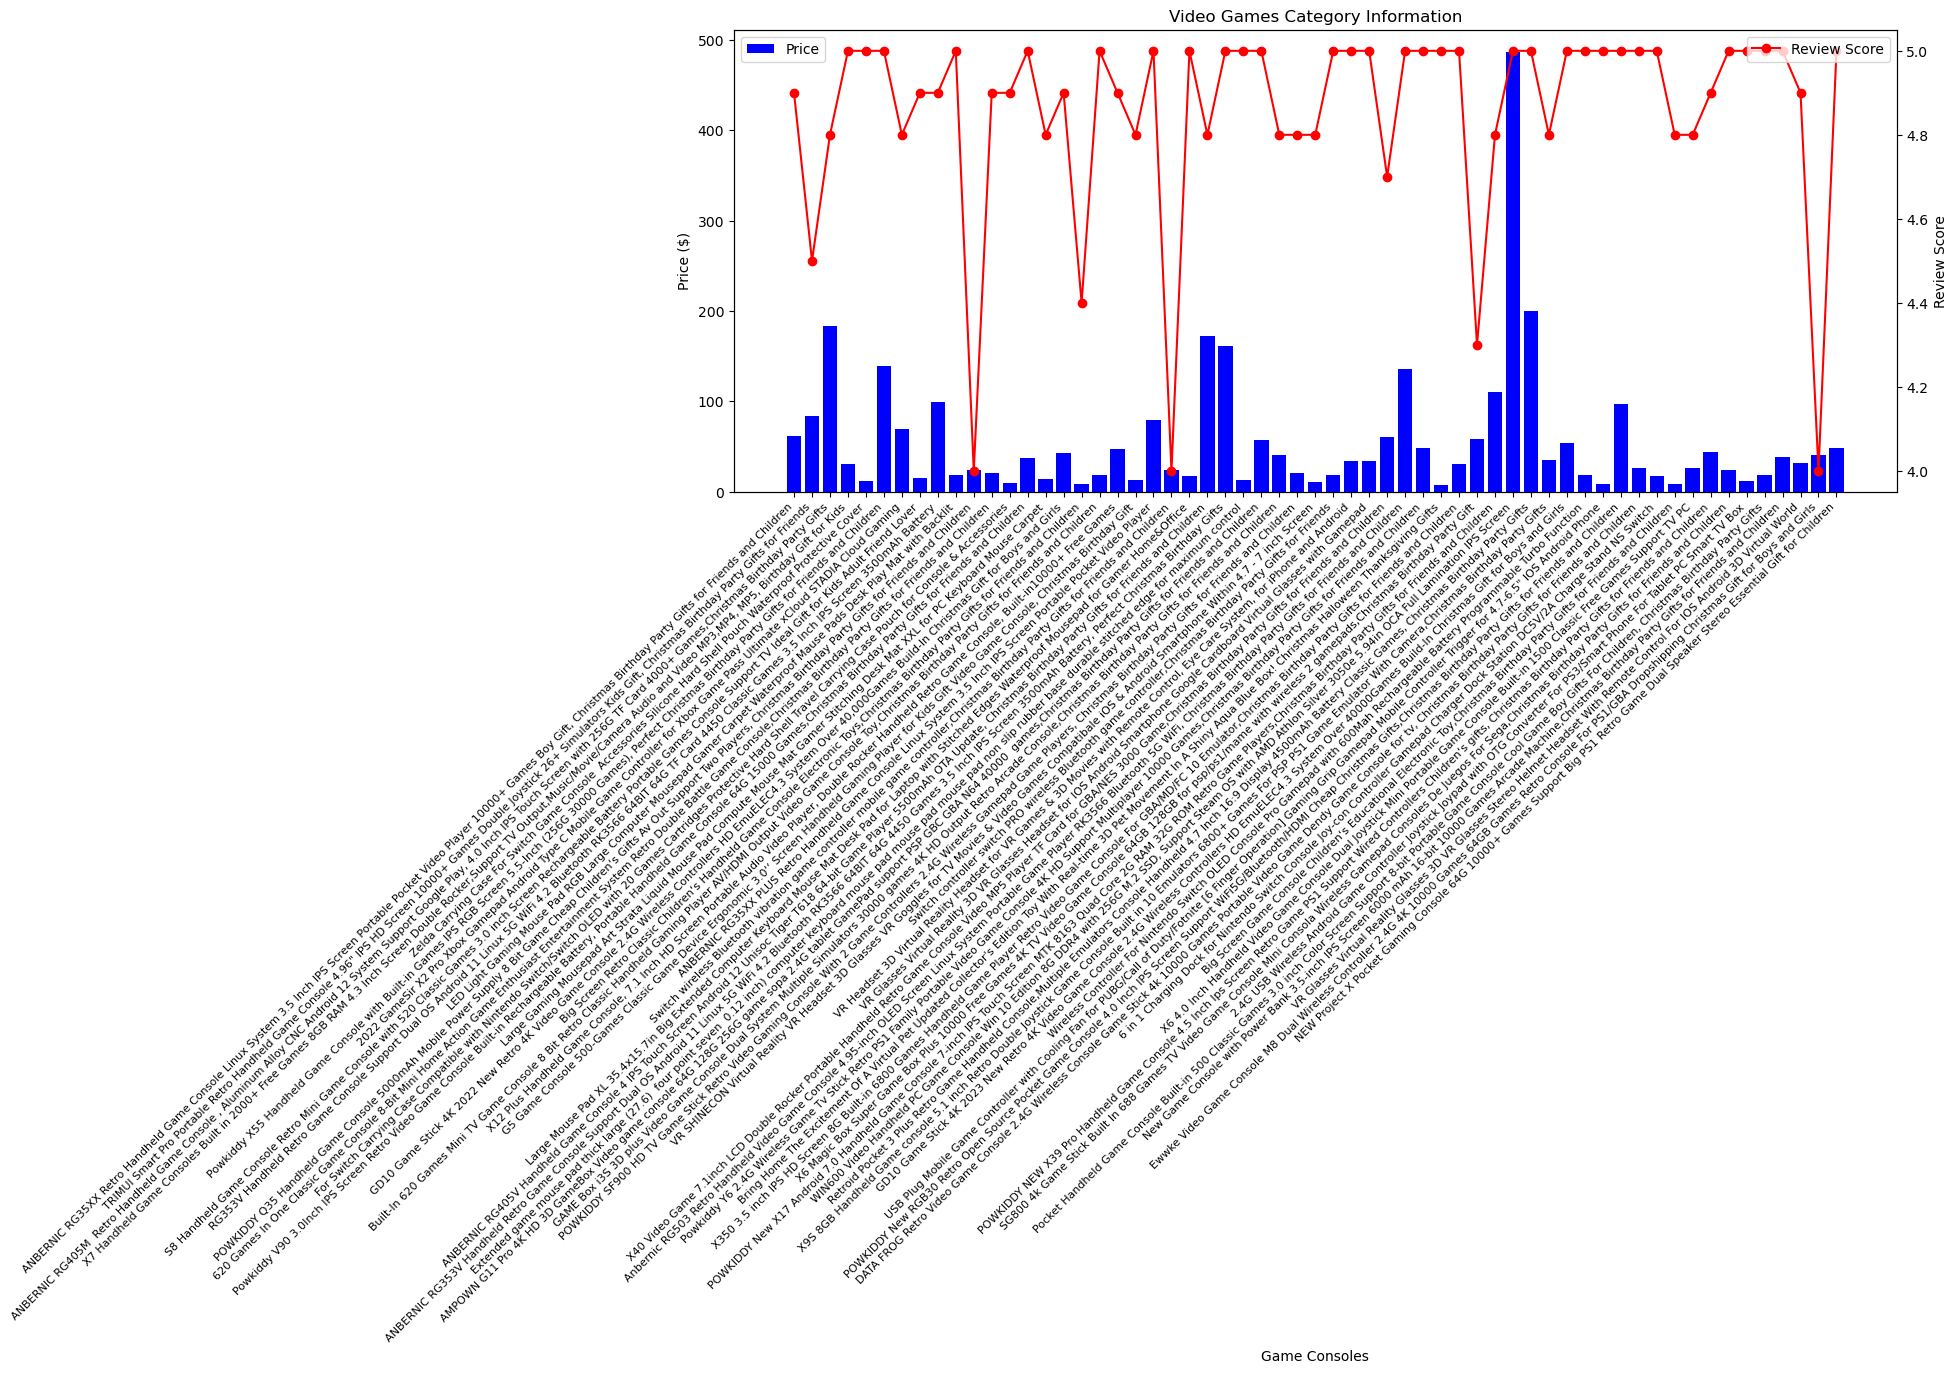

In [9]:
# Assuming 'Title' is the column containing product titles
df2 = pd.read_csv("litb_data.csv")

# Extract numeric values from 'Price' column and convert to integer
df2['Price'] = df2['Price'].replace('[^\d.]', '', regex=True).astype(float).astype(int)

# Convert 'Review Score' column to numeric values
df2['Review Score'] = pd.to_numeric(df2['Review Score'])

# Plotting
fig, ax = plt.subplots(figsize=(15, 6))

# Bar plot for Prices
ax.bar(df2['Title'], df2['Price'], color='blue', label='Price')

# Rotate x-axis labels for better readability
ax.set_xticks(range(len(df2['Title'])))
ax.set_xticklabels(df2['Title'], rotation=45, ha='right', fontsize=8)

# Line plot for Review Scores
ax2 = ax.twinx()
ax2.plot(df2['Title'], df2['Review Score'], color='red', marker='o', label='Review Score')

# Set labels and title
ax.set_ylabel('Price ($)')
ax2.set_ylabel('Review Score')
ax.set_xlabel('Game Consoles')
plt.title('Video Games Category Information')

# Show legend
ax.legend(loc='upper left')
ax2.legend(loc='upper right')

# Show the plot
plt.show()